<a href="https://colab.research.google.com/github/segzy01/Oluwasegun-Durowoju-Prework/blob/master/A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')
#below where the file is in gdrive, change with yours
data_path = "/content/drive/My Drive/AI_764/"
###yearsBase, meanBase = np.loadtxt(data_path + 'file.csv', delimiter=',', unpack=True)

Mounted at /content/drive


In [3]:

# import packages
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Conv2D
#from keras.layers import Convolution2D
#from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from math import ceil
import numpy as np

In [4]:
from IPython.display import display
from PIL import Image

In [11]:
batch_size = 10

data = ImageDataGenerator(rescale=1. / 255, 
                          validation_split=0.2)

training_data = data.flow_from_directory('/content/drive/MyDrive/Iris_Imgs/Iris_Imgs', 
                                         target_size=(200, 200), shuffle=True, batch_size = batch_size, 
                                         class_mode='categorical', subset='training')

training_data_noshuffle = data.flow_from_directory('/content/drive/MyDrive/Iris_Imgs/Iris_Imgs', 
                                         target_size=(200, 200), shuffle=False, batch_size = batch_size, 
                                         class_mode='categorical', subset='training')

test_data = data.flow_from_directory('/content/drive/MyDrive/Iris_Imgs/Iris_Imgs', 
                                     target_size=(200, 200), batch_size = batch_size, shuffle=False,
                                     class_mode='categorical', subset='validation')

numClasses = 3

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


# Achitectural Model

In [12]:


Classifier=Sequential()
Classifier.add(Conv2D(64, kernel_size=(5, 5), input_shape=(200, 200, 3)))
Classifier.add(BatchNormalization())
Classifier.add(Activation('relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Dropout(0.2))
               
Classifier.add(Conv2D(32, kernel_size=(3, 3)))
Classifier.add(BatchNormalization())
Classifier.add(Activation('relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Dropout(0.2))

Classifier.add(Flatten())

Classifier.add(Dense(64, activation='relu'))
Classifier.add(Dense(32, activation='relu'))
Classifier.add(Dense(16, activation='relu'))
Classifier.add(Dense(8, activation='relu'))
Classifier.add(Dense(numClasses, activation='softmax'))

In [13]:
# More options in Compiling and Training CNN
MyEpochs = 30
opt = keras.optimizers.Adam(learning_rate=0.01)
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

Classifier.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt, 
              metrics=['accuracy']) 

Classifier.fit(training_data,
                        batch_size = 10,
                        epochs = MyEpochs,
                        validation_data=test_data,
                        shuffle = 1)

Epoch 1/30
12/12 [==============================] - 37s 3s/step - loss: 0.9380 - accuracy: 0.7000 - val_loss: 0.8056 - val_accuracy: 0.7000
Epoch 2/30
12/12 [==============================] - 26s 2s/step - loss: 0.4762 - accuracy: 0.8750 - val_loss: 0.6986 - val_accuracy: 0.7667
Epoch 3/30
12/12 [==============================] - 28s 2s/step - loss: 0.4120 - accuracy: 0.8333 - val_loss: 0.6813 - val_accuracy: 0.8667
Epoch 4/30
12/12 [==============================] - 24s 2s/step - loss: 0.2664 - accuracy: 0.9167 - val_loss: 0.7317 - val_accuracy: 0.8333
Epoch 5/30
12/12 [==============================] - 25s 2s/step - loss: 0.3468 - accuracy: 0.8417 - val_loss: 0.6666 - val_accuracy: 0.8667
Epoch 6/30
12/12 [==============================] - 25s 2s/step - loss: 0.3248 - accuracy: 0.9167 - val_loss: 0.7179 - val_accuracy: 0.6000
Epoch 7/30
12/12 [==============================] - 24s 2s/step - loss: 0.3780 - accuracy: 0.8917 - val_loss: 0.7617 - val_accuracy: 0.8333
Epoch 8/30
12/12 [==

In [14]:
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 196, 196, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 196, 196, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        1

##Classification Results


In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [16]:
training_data.reset()
test_data.reset()

predicted_scores = Classifier.predict(training_data_noshuffle, verbose=1)
predicted_labels = predicted_scores.argmax(axis=1) 

train_labels = training_data_noshuffle.labels

print(train_labels)
print(predicted_labels)

acc_score = accuracy_score(train_labels, predicted_labels)
CFM = confusion_matrix(train_labels, predicted_labels)

print("\n", "Accuracy: " + str(format(acc_score,'.3f')))
print("\n", "CFM: \n", confusion_matrix(train_labels, predicted_labels))
print("\n", "Classification report: \n", classification_report(train_labels, predicted_labels))

12/12 [==============================] - 13s 1s/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 1]

 Accuracy: 0.892

 CFM: 
 [[35  5  0]
 [ 0 40  0]
 [ 0  8 32]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
           1       0.75      1.00      0.86        40
           2       1.00      0.80      0.89        40

    accuracy                           0.89       120
   macro avg       0.92      0.89      0.89       120
weighted avg       0.92      0.89      0

In [17]:
predicted_scores = Classifier.predict(test_data, verbose=1)
predicted_labels = predicted_scores.argmax(axis=1) 

3/3 [==============================] - 3s 783ms/step


In [19]:
test_labels = test_data.labels
print(test_labels)
#print(predicted_scores)
print(predicted_labels)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2]


In [20]:
acc_score = accuracy_score(test_labels, predicted_labels)
CFM = confusion_matrix(test_labels, predicted_labels)

print("\n", "Accuracy: " + str(format(acc_score,'.3f')))
print("\n", "CFM: \n", confusion_matrix(test_labels, predicted_labels))
print("\n", "Classification report: \n", classification_report(test_labels, predicted_labels))



 Accuracy: 0.933

 CFM: 
 [[ 9  1  0]
 [ 0 10  0]
 [ 0  1  9]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.83      1.00      0.91        10
           2       1.00      0.90      0.95        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



test dataset accuracy: 0.9333333333333333


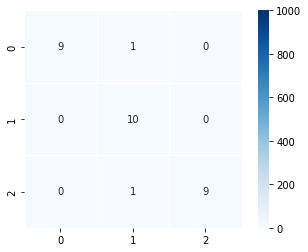

In [21]:
matrix=sns.heatmap(CFM, linewidths=1,vmax=1000,
                  square=True, cmap="Blues",annot=True)
accuracy_score=accuracy_score(test_labels, predicted_labels)
print('test dataset accuracy:',accuracy_score)